In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [133]:
df=pd.read_csv('heart_attack_risk_dataset.csv')
df

Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level  \
0       69  Female        1                    0                Moderate   
1       32    Male        0                    0                Moderate   
2       89    Male        0                    1                Moderate   
3       78    Male        0                    1                Moderate   
4       38  Female        1                    0                Moderate   
...    ...     ...      ...                  ...                     ...   
49995   21    Male        0                    0                     Low   
49996   35  Female        0                    0                     Low   
49997   46    Male        0                    1                    High   
49998   56    Male        0                    1                     Low   
49999   72    Male        0                    0                    High   

         BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
0      34.61         1             0              152.1         171   
1      22.75         0             0              166.8         126   
2      35.32         0             0              272.3         123   
3      18.23         1             0              237.7         144   
4      19.82         0             0              207.7         123   
...      ...       ...           ...                ...         ...   
49995  39.93         0             0              269.9         171   
49996  18.10         0             0              235.8         146   
49997  21.42         0             0              172.8         146   
49998  29.93         0             0              244.1         151   
49999  30.85         0             0              191.8         142   

       Heart_Rate  Family_History Stress_Level Chest_Pain_Type  \
0              85               0     Moderate     Non-anginal   
1             103               0          Low    Asymptomatic   
2             127               0          Low         Typical   
3             125               0          Low         Typical   
4             107               0         High    Asymptomatic   
...           ...             ...          ...             ...   
49995         113               0         High         Typical   
49996          71               0     Moderate     Non-anginal   
49997          85               1          Low         Typical   
49998         110               0          Low    Asymptomatic   
49999          70               0         High    Asymptomatic   

             Thalassemia  Fasting_Blood_Sugar                   ECG_Results  \
0      Reversible defect                    0                        Normal   
1                 Normal                    0              ST-T abnormality   
2      Reversible defect                    0              ST-T abnormality   
3           Fixed defect                    1  Left Ventricular Hypertrophy   
4      Reversible defect                    0              ST-T abnormality   
...                  ...                  ...                           ...   
49995  Reversible defect                    0              ST-T abnormality   
49996       Fixed defect                    1              ST-T abnormality   
49997       Fixed defect                    0  Left Ventricular Hypertrophy   
49998  Reversible defect                    0                        Normal   
49999             Normal                    0              ST-T abnormality   

       Exercise_Induced_Angina  Max_Heart_Rate_Achieved Heart_Attack_Risk  
0                            0                      114               Low  
1                            0                      173          Moderate  
2                            0                      109               Low  
3                            0                      129               Low  
4                            0                      124          Moderate  
...                        ...             

In [134]:
df.isnull().sum()

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

In [135]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")  # Display first 10 unique values


Unique values in Age: [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]
Unique values in Gender: ['Female' 'Male']
Unique values in Smoking: [1 0]
Unique values in Alcohol_Consumption: [0 1]
Unique values in Physical_Activity_Level: ['Moderate' 'Low' 'High']
Unique values in BMI: [34.61 22.75 35.32 ... 17.91 32.81 36.51]
Unique values in Diabetes: [1 0]
Unique values in Hypertension: [0 1]
Unique values in Cholesterol_Level: [152.1 166.8 272.3 ... 292.1 288.2 213.3]
Unique values in Resting_BP: [171 126 123 144 141 154  91 121 167 110 113 109 176 178 125 159 102 108
 120 127 114 165 132 117 158 169 162 112 129 172  97 133 142 107 140 134
 173 104 105 136  96 119 145  95 101 103 124 148  92 106 131 100 137 170
 128 147 149 179  98 152 135 161 174 118 116 157 139 130 111 164 138  99
 150  93 143 153 175 146 177 156 163 1

In [136]:
#no. of columns, rows in the dataset 
df.shape

(50000, 20)

In [137]:
#gathering information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [138]:
#calculate statistical functions
df.describe()

Age       Smoking  Alcohol_Consumption           BMI  \
count  50000.000000  50000.000000         50000.000000  50000.000000   
mean      53.398700      0.298420             0.401980     27.519357   
std       20.799006      0.457569             0.490303      7.225176   
min       18.000000      0.000000             0.000000     15.000000   
25%       35.000000      0.000000             0.000000     21.270000   
50%       53.000000      0.000000             0.000000     27.540000   
75%       71.000000      1.000000             1.000000     33.770000   
max       89.000000      1.000000             1.000000     40.000000   

           Diabetes  Hypertension  Cholesterol_Level    Resting_BP  \
count  50000.000000   50000.00000       50000.000000  50000.000000   
mean       0.198840       0.29738         225.036444    134.434100   
std        0.399131       0.45711          43.317373     25.907961   
min        0.000000       0.00000         150.000000     90.000000   
25%        0.000000       0.00000         187.300000    112.000000   
50%        0.000000       0.00000         225.100000    134.000000   
75%        0.000000       1.00000         262.600000    157.000000   
max        1.000000       1.00000         300.000000    179.000000   

         Heart_Rate  Family_History  Fasting_Blood_Sugar  \
count  50000.000000     50000.00000         50000.000000   
mean      94.530480         0.30034             0.149360   
std       20.187124         0.45841             0.356447   
min       60.000000         0.00000             0.000000   
25%       77.000000         0.00000             0.000000   
50%       94.000000         0.00000             0.000000   
75%      112.000000         1.00000             0.000000   
max      129.000000         1.00000             1.000000   

       Exercise_Induced_Angina  Max_Heart_Rate_Achieved  
count             50000.000000             50000.000000  
mean                  0.201640               149.305340  
std                   0.401229                28.823699  
min                   0.000000               100.000000  
25%                   0.000000               124.000000  
50%                   0.000000               149.000000  
75%                   0.000000               174.000000  
max                   1.000000               199.000000

In [139]:
#check whether duplicate values or not
df.duplicated().sum()

0

In [140]:
# Encode categorical features
label_encoders = {}
categorical_columns = ['Gender', 'Physical_Activity_Level', 'Stress_Level', 'Chest_Pain_Type',
                      'Thalassemia', 'ECG_Results', 'Heart_Attack_Risk']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [141]:
df

Age  Gender  Smoking  Alcohol_Consumption  Physical_Activity_Level  \
0       69       0        1                    0                        2   
1       32       1        0                    0                        2   
2       89       1        0                    1                        2   
3       78       1        0                    1                        2   
4       38       0        1                    0                        2   
...    ...     ...      ...                  ...                      ...   
49995   21       1        0                    0                        1   
49996   35       0        0                    0                        1   
49997   46       1        0                    1                        0   
49998   56       1        0                    1                        1   
49999   72       1        0                    0                        0   

         BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
0      34.61         1             0              152.1         171   
1      22.75         0             0              166.8         126   
2      35.32         0             0              272.3         123   
3      18.23         1             0              237.7         144   
4      19.82         0             0              207.7         123   
...      ...       ...           ...                ...         ...   
49995  39.93         0             0              269.9         171   
49996  18.10         0             0              235.8         146   
49997  21.42         0             0              172.8         146   
49998  29.93         0             0              244.1         151   
49999  30.85         0             0              191.8         142   

       Heart_Rate  Family_History  Stress_Level  Chest_Pain_Type  Thalassemia  \
0              85               0             2                2            2   
1             103               0             1                0            1   
2             127               0             1                3            2   
3             125               0             1                3            0   
4             107               0             0                0            2   
...           ...             ...           ...              ...          ...   
49995         113               0             0                3            2   
49996          71               0             2                2            0   
49997          85               1             1                3            0   
49998         110               0             1                0            2   
49999          70               0             0                0            1   

       Fasting_Blood_Sugar  ECG_Results  Exercise_Induced_Angina  \
0                        0            1                        0   
1                        0            2                        0   
2                        0            2                        0   
3                        1            0                        0   
4                        0            2                        0   
...                    ...          ...                      ...   
49995                    0            2                        0   
49996                    1            2                        0   
49997                    0            0                        0   
49998                    0            1                        0   
49999                    0            2                        0   

       Max_Heart_Rate_Achieved  Heart_Attack_Risk  
0                          114                  1  
1                          173                  2  
2                          109                  1  
3                          129                  1  
4                          124                  2  
...                        ...                ...  
49995                      122                  0  
49996                  

In [142]:
#minimum value at each column
df.min()

Age                         18.0
Gender                       0.0
Smoking                      0.0
Alcohol_Consumption          0.0
Physical_Activity_Level      0.0
BMI                         15.0
Diabetes                     0.0
Hypertension                 0.0
Cholesterol_Level          150.0
Resting_BP                  90.0
Heart_Rate                  60.0
Family_History               0.0
Stress_Level                 0.0
Chest_Pain_Type              0.0
Thalassemia                  0.0
Fasting_Blood_Sugar          0.0
ECG_Results                  0.0
Exercise_Induced_Angina      0.0
Max_Heart_Rate_Achieved    100.0
Heart_Attack_Risk            0.0
dtype: float64

In [143]:
#maximum value at each column
df.max()

Age                         89.0
Gender                       1.0
Smoking                      1.0
Alcohol_Consumption          1.0
Physical_Activity_Level      2.0
BMI                         40.0
Diabetes                     1.0
Hypertension                 1.0
Cholesterol_Level          300.0
Resting_BP                 179.0
Heart_Rate                 129.0
Family_History               1.0
Stress_Level                 2.0
Chest_Pain_Type              3.0
Thalassemia                  2.0
Fasting_Blood_Sugar          1.0
ECG_Results                  2.0
Exercise_Induced_Angina      1.0
Max_Heart_Rate_Achieved    199.0
Heart_Attack_Risk            2.0
dtype: float64

In [144]:
#first 5 rows
df.head()

Age  Gender  Smoking  Alcohol_Consumption  Physical_Activity_Level    BMI  \
0   69       0        1                    0                        2  34.61   
1   32       1        0                    0                        2  22.75   
2   89       1        0                    1                        2  35.32   
3   78       1        0                    1                        2  18.23   
4   38       0        1                    0                        2  19.82   

   Diabetes  Hypertension  Cholesterol_Level  Resting_BP  Heart_Rate  \
0         1             0              152.1         171          85   
1         0             0              166.8         126         103   
2         0             0              272.3         123         127   
3         1             0              237.7         144         125   
4         0             0              207.7         123         107   

   Family_History  Stress_Level  Chest_Pain_Type  Thalassemia  \
0               0             2                2            2   
1               0             1                0            1   
2               0             1                3            2   
3               0             1                3            0   
4               0             0                0            2   

   Fasting_Blood_Sugar  ECG_Results  Exercise_Induced_Angina  \
0                    0            1                        0   
1                    0            2                        0   
2                    0            2                        0   
3                    1            0                        0   
4                    0            2                        0   

   Max_Heart_Rate_Achieved  Heart_Attack_Risk  
0                      114                  1  
1                      173                  2  
2                      109                  1  
3                      129                  1  
4                      124                  2

In [145]:
#last 5 rows
df.tail()

Age  Gender  Smoking  Alcohol_Consumption  Physical_Activity_Level  \
49995   21       1        0                    0                        1   
49996   35       0        0                    0                        1   
49997   46       1        0                    1                        0   
49998   56       1        0                    1                        1   
49999   72       1        0                    0                        0   

         BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
49995  39.93         0             0              269.9         171   
49996  18.10         0             0              235.8         146   
49997  21.42         0             0              172.8         146   
49998  29.93         0             0              244.1         151   
49999  30.85         0             0              191.8         142   

       Heart_Rate  Family_History  Stress_Level  Chest_Pain_Type  Thalassemia  \
49995         113               0             0                3            2   
49996          71               0             2                2            0   
49997          85               1             1                3            0   
49998         110               0             1                0            2   
49999          70               0             0                0            1   

       Fasting_Blood_Sugar  ECG_Results  Exercise_Induced_Angina  \
49995                    0            2                        0   
49996                    1            2                        0   
49997                    0            0                        0   
49998                    0            1                        0   
49999                    0            2                        0   

       Max_Heart_Rate_Achieved  Heart_Attack_Risk  
49995                      122                  0  
49996                      121                  2  
49997                      125                  1  
49998                      149                  2  
49999                      144                  2

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

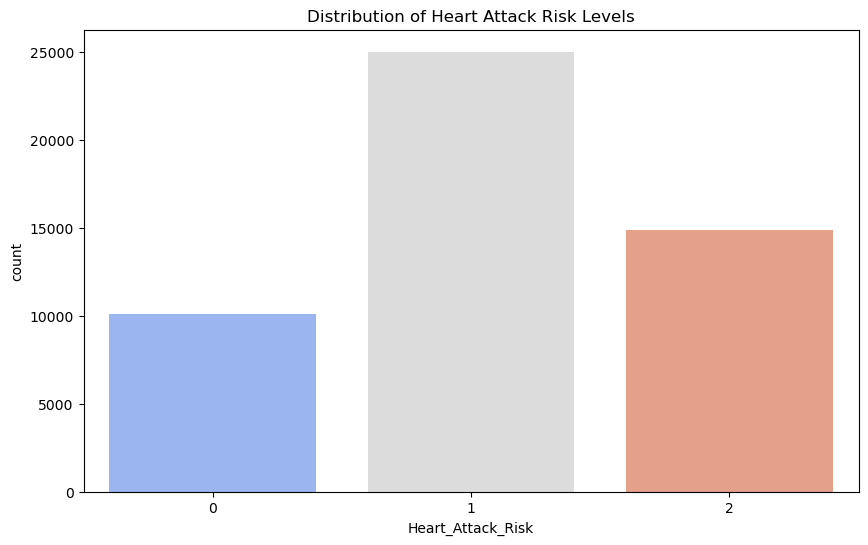

In [147]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Heart_Attack_Risk', data=df, palette='coolwarm')
plt.title('Distribution of Heart Attack Risk Levels')
plt.show()


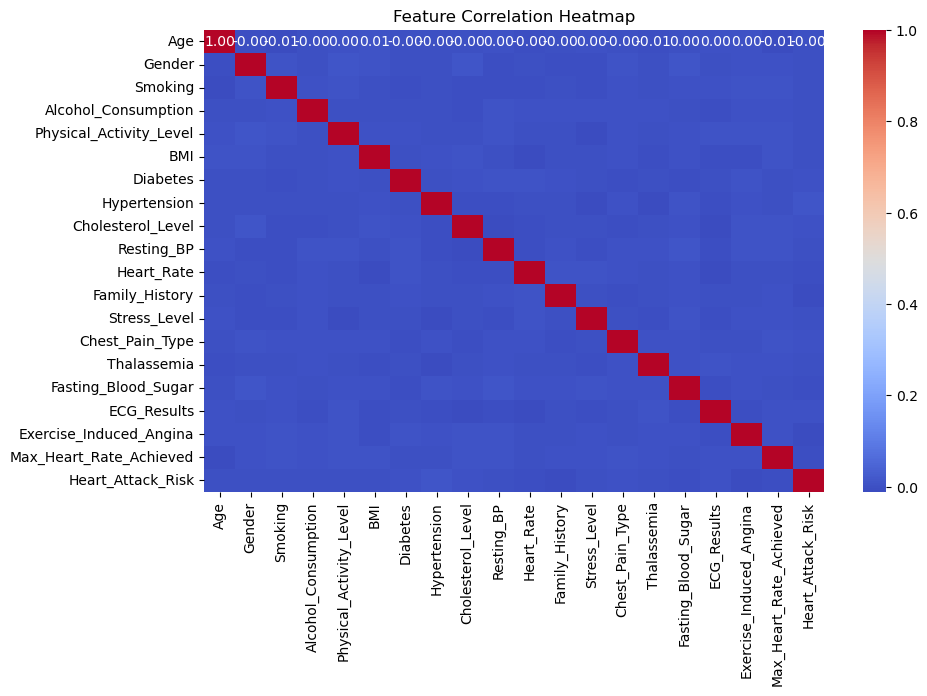

In [148]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [149]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

plt.subplot(241)
sns.boxplot(x='Age', color='cyan', data=df)
plt.title('Box Plot for Age')

plt.subplot(242)
sns.boxplot(x='Gender', color='cyan', data=df)
plt.title('Box Plot for Gender')

plt.subplot(243)
sns.boxplot(x='Smoking', color='cyan', data=df)
plt.title('Box Plot for Smoking')

plt.subplot(244)
sns.boxplot(x='Alcohol_Consumption', color='cyan', data=df)
plt.title('Box Plot for Alcohol Consumption')

plt.subplot(245)
sns.boxplot(x='Physical_Activity_Level', color='cyan', data=df)
plt.title('Box Plot for Physical_Activity_Level')

plt.subplot(246)
sns.boxplot(x='BMI', color='cyan', data=df)
plt.title('Box Plot for BMI')

plt.subplot(247)
sns.boxplot(x='Chest_Pain_Type', color='cyan', data=df)
plt.title('Box Plot for Chest_Pain_Type')
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [150]:
#pairplot
sns.pairplot(df)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

In [151]:
#Correlation
df.corr()

Age    Gender   Smoking  Alcohol_Consumption  \
Age                      1.000000 -0.003514 -0.010123            -0.000250   
Gender                  -0.003514  1.000000  0.007270            -0.002768   
Smoking                 -0.010123  0.007270  1.000000             0.001877   
Alcohol_Consumption     -0.000250 -0.002768  0.001877             1.000000   
Physical_Activity_Level  0.001932  0.012247  0.007381             0.000027   
BMI                      0.006035  0.006171 -0.002649             0.000199   
Diabetes                -0.001944  0.000812 -0.003164            -0.001174   
Hypertension            -0.001635 -0.001394 -0.000689            -0.001342   
Cholesterol_Level       -0.000650  0.009317 -0.004103            -0.003098   
Resting_BP               0.003387 -0.004651 -0.004969             0.004930   
Heart_Rate              -0.004448 -0.002634 -0.004322             0.002849   
Family_History          -0.001106 -0.005643 -0.001561             0.001287   
Stress_Level             0.003926 -0.004472 -0.005567             0.003622   
Chest_Pain_Type         -0.000664  0.005784  0.002046             0.001542   
Thalassemia             -0.006925 -0.000011 -0.000829             0.003558   
Fasting_Blood_Sugar      0.000128  0.009297  0.001766            -0.001257   
ECG_Results              0.003594 -0.002326  0.001031            -0.004673   
Exercise_Induced_Angina  0.002802  0.001031  0.006028             0.002668   
Max_Heart_Rate_Achieved -0.007056  0.003898  0.005646             0.001785   
Heart_Attack_Risk       -0.001509 -0.001411 -0.002558            -0.000662   

                         Physical_Activity_Level       BMI  Diabetes  \
Age                                     0.001932  0.006035 -0.001944   
Gender                                  0.012247  0.006171  0.000812   
Smoking                                 0.007381 -0.002649 -0.003164   
Alcohol_Consumption                     0.000027  0.000199 -0.001174   
Physical_Activity_Level                 1.000000  0.003918  0.001667   
BMI                                     0.003918  1.000000 -0.000062   
Diabetes                                0.001667 -0.000062  1.000000   
Hypertension                           -0.000724  0.001564 -0.001157   
Cholesterol_Level                      -0.002010  0.005346  0.000933   
Resting_BP                              0.005217 -0.000864  0.007476   
Heart_Rate                             -0.000412 -0.009769  0.004813   
Family_History                         -0.002926 -0.001644  0.001751   
Stress_Level                           -0.010989  0.000380 -0.002350   
Chest_Pain_Type                         0.001816  0.003045 -0.004647   
Thalassemia                            -0.000491 -0.003712  0.000331   
Fasting_Blood_Sugar                     0.002935  0.002819 -0.006317   
ECG_Results                             0.005397 -0.003312  0.000460   
Exercise_Induced_Angina                 0.005985 -0.004930  0.006531   
Max_Heart_Rate_Achieved                 0.006603  0.005871 -0.001475   
Heart_Attack_Risk                      -0.001496  0.000498  0.003450   

                         Hypertension  Cholesterol_Level  Resting_BP  \
Age                         -0.001635          -0.000650    0.003387   
Gender                      -0.001394           0.009317   -0.004651   
Smoking                     -0.000689          -0.004103   -0.004969   
Alcohol_Consumption         -0.001342          -0.003098    0.004930   
Physical_Activity_Level     -0.000724          -0.002010    0.005217   
BMI                          0.001564           0.005346   -0.000864   
Diabetes                    -0.001157           0.000933    0.007476   
Hypertension                 1.000000          -0.003229   -0.005184   
Cholesterol_Level           -0.003229           1.000000   -0.008222   
Resting_BP                  -0.005184          -0.008222    1.000000   
Heart_Rate                  -0.002080          -0.003920   -0.003167   
Family_History

In [152]:
# Separate features and target
X = df.drop(columns=['Heart_Attack_Risk'])
y = df['Heart_Attack_Risk']


In [153]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [156]:
# Predictions
y_pred = model.predict(X_test)


In [157]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(report)


Accuracy: 0.4940
              precision    recall  f1-score   support

           0       0.33      0.01      0.01      1987
           1       0.51      0.94      0.66      5083
           2       0.26      0.05      0.08      2930

    accuracy                           0.49     10000
   macro avg       0.37      0.33      0.25     10000
weighted avg       0.40      0.49      0.36     10000



In [158]:
# Example usage
def predict_heart_attack_risk(new_data):
    new_df = pd.DataFrame([new_data], columns=X.columns)
    new_df = pd.DataFrame(scaler.transform(new_df), columns=X.columns)
    prediction = model.predict(new_df)
    return label_encoders['Heart_Attack_Risk'].inverse_transform(prediction)[0]
    
sample_data = {
    'Age': 45,
    'Gender': label_encoders['Gender'].transform(['Male'])[0],
    'Smoking': 1,
    'Alcohol_Consumption': 0,
    'Physical_Activity_Level': label_encoders['Physical_Activity_Level'].transform(['Moderate'])[0],
    'BMI': 25.0,
    'Diabetes': 0,
    'Hypertension': 1,
    'Cholesterol_Level': 200.0,
    'Resting_BP': 120,
    'Heart_Rate': 80,
    'Family_History': 1,
    'Stress_Level': label_encoders['Stress_Level'].transform(['High'])[0],
    'Chest_Pain_Type': label_encoders['Chest_Pain_Type'].transform(['Typical'])[0],
    'Thalassemia': label_encoders['Thalassemia'].transform(['Normal'])[0],
    'Fasting_Blood_Sugar': 0,
    'ECG_Results': label_encoders['ECG_Results'].transform(['Normal'])[0],
    'Exercise_Induced_Angina': 0,
    'Max_Heart_Rate_Achieved': 150
}

predicted_risk = predict_heart_attack_risk(sample_data)
print(f'Predicted Heart Attack Risk: {predicted_risk}')


Predicted Heart Attack Risk: Low


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [159]:
#model building 
from sklearn.linear_model import LogisticRegression

In [160]:
classifier = LogisticRegression()

In [161]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [162]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [163]:
#accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [164]:
score1 = accuracy_score(y_pred,y_test)
print('Accuracy using Logistic Regression: ',score1)

Accuracy using Logistic Regression:  0.5083


In [165]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1987
           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[   0 1987    0]
 [   0 5083    0]
 [   0 2930    0]]


In [167]:
#model building 
from sklearn.tree import DecisionTreeClassifier

In [168]:
treemodel=DecisionTreeClassifier()

In [169]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.2934355564755903, 0.9875, 'x[18] <= -1.691\ngini = 0.621\nsamples = 40000\nvalue = [8085, 19941, 11974]'),
 Text(0.004163425490576698, 0.9625, 'x[16] <= -0.618\ngini = 0.65\nsamples = 395\nvalue = [92, 164, 139]'),
 Text(0.0012279865696053487, 0.9375, 'x[5] <= -0.655\ngini = 0.634\nsamples = 134\nvalue = [27, 46, 61]'),
 Text(0.0005642440853160987, 0.9125, 'x[5] <= -0.989\ngini = 0.448\nsamples = 42\nvalue = [5, 7, 30]'),
 Text(0.0004836377874137989, 0.8875, 'x[9] <= 1.601\ngini = 0.558\nsamples = 30\nvalue = [5, 7, 18]'),
 Text(0.0004030314895114991, 0.8625, 'x[14] <= 0.608\ngini = 0.523\nsamples = 28\nvalue = [5, 5, 18]'),
 Text(0.00032242519160919925, 0.8375, 'x[8] <= -0.051\ngini = 0.625\nsamples = 20\nvalue = [5, 5, 10]'),
 Text(0.00016121259580459963, 0.8125, 'x[10] <= 0.946\ngini = 0.245\nsamples = 7\nvalue = [1, 0, 6]'),
 Text(8.060629790229981e-05, 0.7875, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.00024181889370689945, 0.7875, 'gini = 0.0\nsamples = 1\nval

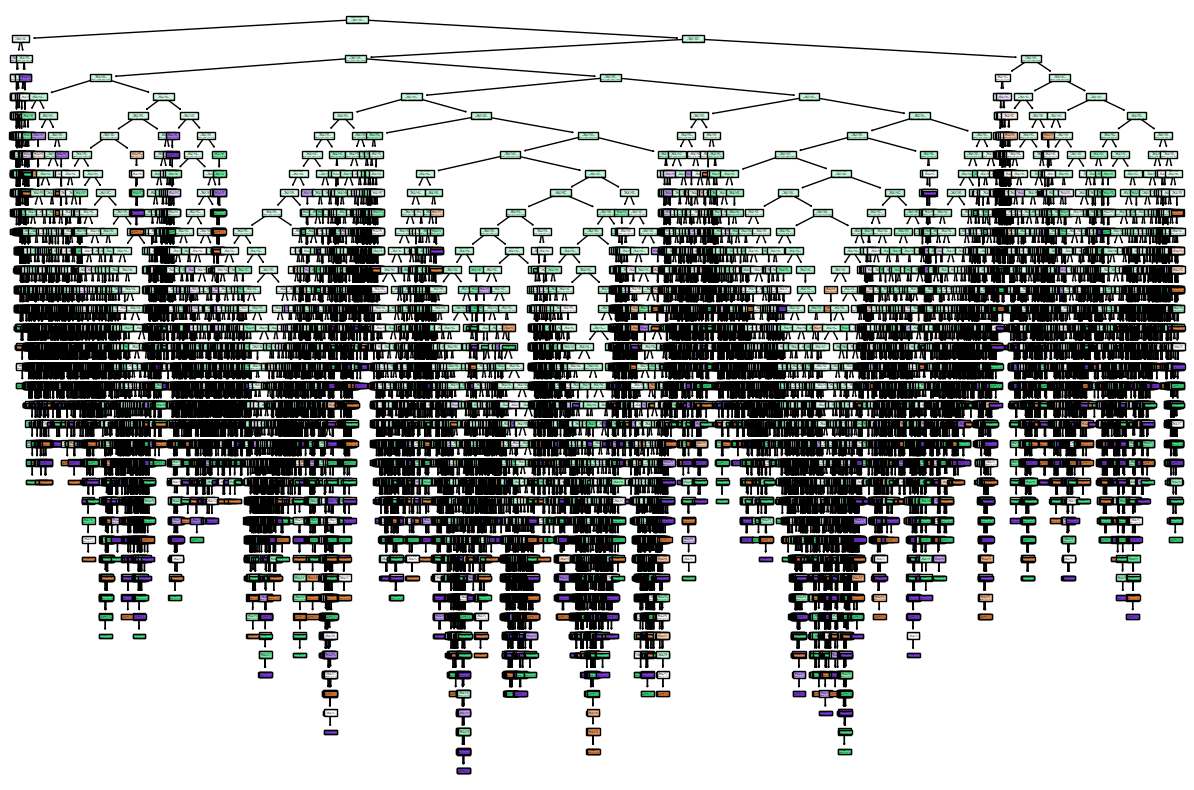

In [170]:
#constructing tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [171]:
#prediction
y_pred=treemodel.predict(X_test)

In [172]:
score2 = accuracy_score(y_pred,y_test)
print('Accuracy using Decision Tree Classification: ',score2)

Accuracy using Decision Tree Classification:  0.3735


In [173]:
report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.19      0.21      0.20      1987
           1       0.51      0.48      0.50      5083
           2       0.29      0.29      0.29      2930

    accuracy                           0.37     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.38      0.37      0.38     10000



In [174]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm1)

Confusion Matrix:
 [[ 410  949  628]
 [1129 2463 1491]
 [ 648 1420  862]]


In [175]:
#model building
from sklearn.neighbors import KNeighborsClassifier

In [176]:
knn=KNeighborsClassifier(n_neighbors=3)

In [177]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [178]:
y_pred=knn.predict(X_test)

In [179]:
#Accuracy Score
score4 = accuracy_score(y_pred,y_test)
print('Accuracy using KNeighbors Classification: ',score4)

Accuracy using KNeighbors Classification:  0.371


In [180]:
report3 = classification_report(y_test, y_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.20      0.30      0.24      1987
           1       0.51      0.49      0.50      5083
           2       0.29      0.22      0.25      2930

    accuracy                           0.37     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.38      0.37      0.37     10000



In [181]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm3)

Confusion Matrix:
 [[ 590  973  424]
 [1461 2489 1133]
 [ 842 1457  631]]


In [182]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Train a Support Vector Classifier
clf = SVC(kernel='linear')


In [183]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [184]:
y_pred = clf.predict(X_test)

In [185]:
# Accuracy of the model
score6 = accuracy_score(y_test, y_pred)
print('Accuracy of SVM is: ',score6)

Accuracy of SVM is:  0.5083


In [186]:
report5 = classification_report(y_test, y_pred)
print(report5)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1987
           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm5 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm5)

Confusion Matrix:
 [[   0 1987    0]
 [   0 5083    0]
 [   0 2930    0]]


In [188]:
# Save the model, scaler, and encoders
import joblib
joblib.dump(model, "heart_attack_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

def predict_heart_attack_risk(new_data):
    model = joblib.load("heart_attack_model.pkl")
    scaler = joblib.load("scaler.pkl")
    label_encoders = joblib.load("label_encoders.pkl")
    
    new_df = pd.DataFrame([new_data], columns=X.columns)
    new_df = pd.DataFrame(scaler.transform(new_df), columns=X.columns)
    prediction = model.predict(new_df)
    return label_encoders['Heart_Attack_Risk'].inverse_transform(prediction)[0]

if __name__ == "__main__":
    print("Model training complete and saved successfully.")

Model training complete and saved successfully.


In [189]:
scores={'Model':['Logistic Regression','Decisin Tree Classification','Random Forest Classification','KNeighbors Classification',
                 'Naive Bayes Theorem','Support Vector Machine'],
        'Accuracy':[score1,score2,accuracy,score4,score5,score6]}
scorecomparison=pd.DataFrame(scores)
scorecomparison

Model  Accuracy
0           Logistic Regression    0.5083
1   Decisin Tree Classification    0.3735
2  Random Forest Classification    0.4940
3     KNeighbors Classification    0.3710
4           Naive Bayes Theorem    0.5083
5        Support Vector Machine    0.5083

In [190]:
confusion={'Model':['Logistic Regression','Decisin Tree Classification','KNeighbors Classification','Naive Bayes Theorem','Support Vector Machine'],
                   'Confusion Matrix':[cm,cm1,cm3,cm4,cm5]}
compare_matrix=pd.DataFrame(confusion)
compare_matrix


Model  \
0          Logistic Regression   
1  Decisin Tree Classification   
2    KNeighbors Classification   
3          Naive Bayes Theorem   
4       Support Vector Machine   

                                    Confusion Matrix  
0         [[0, 1987, 0], [0, 5083, 0], [0, 2930, 0]]  
1  [[410, 949, 628], [1129, 2463, 1491], [648, 14...  
2  [[590, 973, 424], [1461, 2489, 1133], [842, 14...  
3         [[0, 1987, 0], [0, 5083, 0], [0, 2930, 0]]  
4         [[0, 1987, 0], [0, 5083, 0], [0, 2930, 0]]

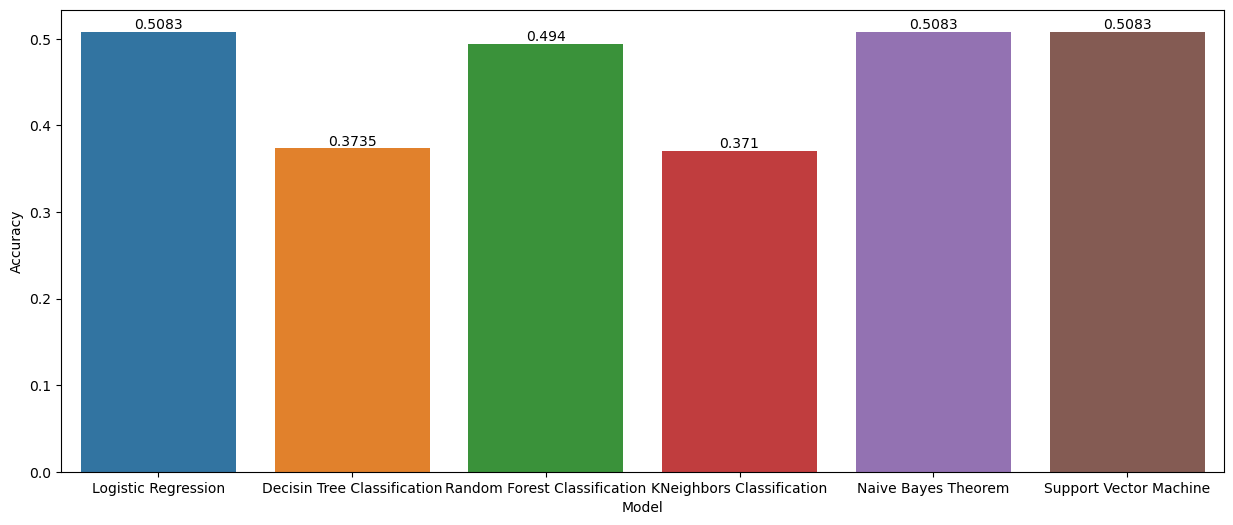

In [191]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='Model',y='Accuracy',data=scorecomparison)
for container in ax.containers:
    ax.bar_label(container)
